In [1]:
import pandas as pd
import torch
from kan import *

In [2]:
df = pd.read_csv('solvents_properties.csv')
df

,Solvents,δd,δp,δh,δT,X2,Δδ,Weight
0,Ethanol,15.8,8.8,19.4,26.50,1.87·10^-4,7.36,0.01
1,Water,15.6,16.0,42.3,47.90,1.42·10^-5,20.79,1.00
2,Ethyl acetate,15.1,5.3,9.2,18.50,7.82·10^-6,16.15,0.01
3,"1,4-Dioxane",19.0,1.8,7.4,20.50,2.35·10^-5,20.37,1.00
4,Acetic acid,14.5,8.0,13.5,21.40,4.32·10^-3,11.13,0.01
5,1-Pentanol,13.0,4.5,13.9,21.70,1.06·10^-4,13.61,1.00
6,DMF,17.4,13.7,11.3,24.80,6.67·10^-3,10.88,0.01
7,Benzene,18.4,1.0,2.0,18.60,5.56·10^-7,24.79,1.00
8,Cl-Benzene,19.0,4.3,2.0,19.60,1.27·10^-6,23.10,0.01
9,1-Octanol,17.0,3.3,11.9,20.90,9.75·10^-5,15.93,1.00


In [3]:
df.columns

Index(['Solvents', 'δd', 'δp', 'δh', 'δT', 'X2', 'Δδ', 'Weight'], dtype='object')

In [4]:
X = torch.tensor(df[['δd', 'δp', 'δh']].values)
y = torch.tensor(df['δT'].values)

cpu
checkpoint directory created: ./model
saving model version 0.0


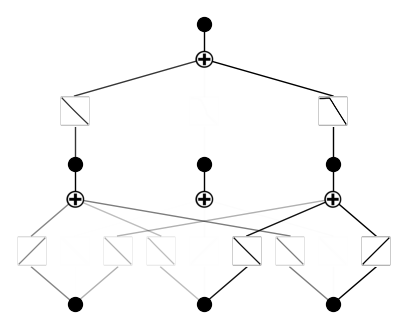

In [5]:
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,3,1], grid=3, k=2, seed=42, device=device)
model(X)
model.plot()

In [6]:
from sklearn.model_selection import train_test_split

def generate_kan_dataset(X, y):
    """
    Generate dataset for kan.

    Args:
        X(nparray): tensor of train_input.
        y(nparray): tensor of train_label.
    Returns:
        dict: A dictionary containing train_input, train_label, test_input, test_label
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(X_train)
    dataset['test_input'] = torch.tensor(X_test)
    dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
    dataset['test_label'] = torch.tensor(y_test).reshape(-1, 1)

    return dataset

In [7]:
dataset = generate_kan_dataset(X, y)

/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_5926/584215959.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_input'] = torch.tensor(X_train)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_5926/584215959.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['test_input'] = torch.tensor(X_test)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_5926/584215959.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
/var/fold

In [8]:
dataset

{'train_input': tensor([[19.0000,  4.3000,  2.0000],
         [15.5000,  5.7000, 11.2000],
         [15.1000,  5.3000,  9.2000],
         [17.0000,  3.3000, 11.9000],
         [19.0000,  7.4000,  4.1000],
         [14.5000,  8.0000, 13.5000],
         [18.4000,  1.0000,  2.0000],
         [19.6000,  8.6000,  3.7000],
         [15.9000,  2.1000,  2.8000],
         [19.0000,  1.8000,  7.4000],
         [17.4000, 13.7000, 11.3000]]),
 'test_input': tensor([[15.8000,  8.8000, 19.4000],
         [15.6000, 16.0000, 42.3000],
         [13.0000,  4.5000, 13.9000],
         [15.3000, 18.0000,  6.1000],
         [15.5000, 10.4000,  7.0000],
         [15.1000, 12.3000, 22.3000]]),
 'train_label': tensor([[19.6000],
         [19.9500],
         [18.5000],
         [20.9000],
         [20.8000],
         [21.4000],
         [18.6000],
         [21.7000],
         [16.3000],
         [20.5000],
         [24.8000]]),
 'test_label': tensor([[26.5000],
         [47.9000],
         [21.7000],
         [

In [9]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [10]:
# train the model
result = model.fit(dataset, opt="LBFGS", steps=50, metrics=(train_acc, test_acc))

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

| train_loss: 7.91e-10 | test_loss: 6.12e+00 | reg: 1.26e+01 | : 100%|█| 50/50 [00:01<00:00, 31.23it

saving model version 0.1


In [11]:
result

{'train_loss': [array(0.22330547),
  array(0.09211758),
  array(0.03491678),
  array(0.01424726),
  array(0.01089331),
  array(0.00403705),
  array(0.00284276),
  array(0.00159998),
  array(0.00074779),
  array(0.00054721),
  array(0.00049355),
  array(0.00011382),
  array(1.18162144e-05),
  array(2.78407474e-06),
  array(9.2264553e-07),
  array(0.0002895),
  array(0.00012607),
  array(2.34821108e-05),
  array(1.38968245e-06),
  array(5.59851433e-07),
  array(0.00017046),
  array(3.09040611e-05),
  array(5.50902555e-06),
  array(2.65071756e-06),
  array(3.33138808e-07),
  array(7.92478012e-05),
  array(2.64926795e-05),
  array(3.37229642e-06),
  array(3.2354844e-07),
  array(1.04804021e-07),
  array(1.14843892e-05),
  array(9.85665584e-07),
  array(1.92097672e-07),
  array(6.22693722e-08),
  array(2.67323426e-08),
  array(3.5836615e-06),
  array(1.15618537e-06),
  array(5.14834621e-07),
  array(1.24036479e-07),
  array(2.95517002e-08),
  array(5.04867607e-07),
  array(8.35994173e-08),


In [12]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']

model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9998251148459677, c=1
fixing (0,0,1) with x, r2=0.9999956003855305, c=1
fixing (0,0,2) with x, r2=0.9999991853232059, c=1
fixing (0,1,0) with x, r2=0.9986418591989042, c=1
fixing (0,1,1) with x, r2=0.99994799503174, c=1
fixing (0,1,2) with x, r2=0.9999931040595723, c=1
fixing (0,2,0) with x, r2=0.9940155323468536, c=1
fixing (0,2,1) with x, r2=0.9999984191526095, c=1
fixing (0,2,2) with x, r2=0.9999979683237239, c=1
fixing (1,0,0) with x, r2=0.9999997842981413, c=1
fixing (1,1,0) with sin, r2=0.9950043128079783, c=2
fixing (1,2,0) with x, r2=0.0031233788127019687, c=1
saving model version 0.2


In [13]:
from kan.utils import ex_round

result = ex_round(model.symbolic_formula()[0][0], 4)
result

0.7929*x_1 + 0.3566*x_2 + 0.3493*x_3 - 0.4345*sin(1.2004*x_1 - 0.7402*x_2 + 1.3681*x_3 - 6.1041) + 1.8223

In [15]:
import math

# Given values
x1 = 15.8
x2 = 8.8
x3 = 9.4

# Calculate the result of the equation
result = (
    0.7931 * x1
    + 0.3564 * x2
    + 0.3495 * x3
    + 0.4249 * math.sin(1.2026 * x1 - 0.7399 * x2 + 1.3698 * x3 + 3.2397)
    + 1.8047
)

result


20.61903296057236